In [1]:
import time
start_time=time.time()

In [2]:
import sys
from pathlib import Path
import json
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from rebin_utils import downsample, oversample


Input path

observations folder location

In [3]:
text_file_0 = open("path-observations.txt", "r")
path_obs = text_file_0.read()

In [4]:
datapath_obs = Path(path_obs).expanduser()

results folder location

In [5]:
text_file_1 = open("path-results.txt", "r")
path_res = text_file_1.read()

In [6]:
datapath_res= Path(path_res).expanduser()

files names

In [7]:
data_file = 'MUSE-N346-S-'

In [8]:
name_export='MUSE-N346-S'

In [9]:
flux_in = data_file + 'sum.fits'
radial_velocity_in = data_file + 'vmean.fits'
sigma_in = data_file + 'sigma.fits'

In [10]:
flux=fits.open(datapath_obs / flux_in)
rad_vel=fits.open(datapath_obs / radial_velocity_in)
sigma=fits.open(datapath_obs / sigma_in)

Input data of the region

In [11]:
dist = 62000 #parsecs
pix = 0.2 #arcsec
seeing = 0.9 #seeing arcsec FWHM

In [12]:
pc = dist*(2*np.pi) / (360 * 60 * 60)
s0 = (seeing*pc)/2.355 #seeing pc RMS
pc,s0

(0.3005844822879123, 0.11487305055589005)

In [13]:
sb = flux["DATA"].data.astype("float")
vv = rad_vel["DATA"].data.astype("float")
ss = sigma["DATA"].data.astype("float")

In [14]:
## Replace spurious values in the arrays
m = ~np.isfinite(sb*vv*ss) | (sb < 0.0)

sb[m] = 0.0
vv[m] = np.nanmean(vv)
ss[m] = 0.0
sb /= sb.max()

good = (~m) & (sb > 0.001)

<ipython-input-14-95afb24455fa>:2: RuntimeWarning: invalid value encountered in less
  m = ~np.isfinite(sb*vv*ss) | (sb < 0.0)


In [15]:
trim = (slice(15, 310), slice(10, 310))

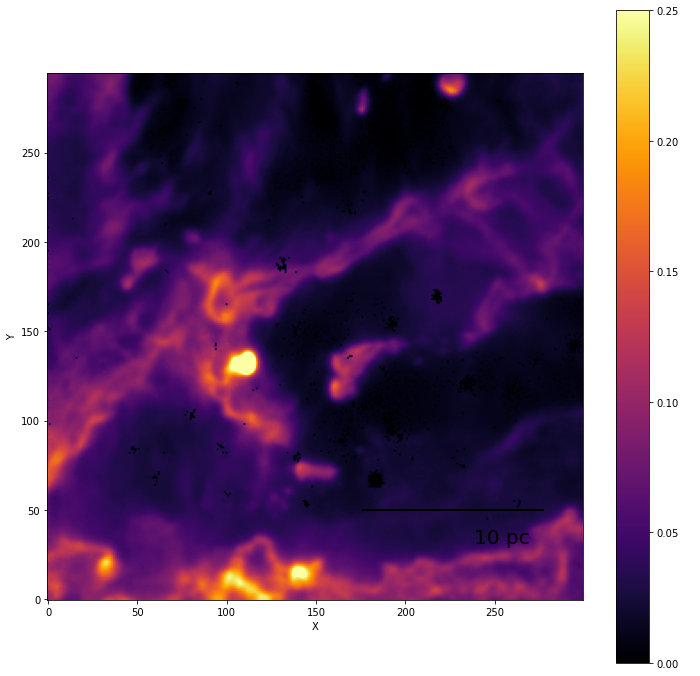

In [16]:
fig, ax = plt.subplots(figsize=(12, 12))


dataI=sb[trim]

plt.figure(1)
plt.imshow(dataI, cmap='inferno')

cbar = plt.colorbar()
plt.clim(0,0.25)
cbar.set_label(' ', rotation=270, labelpad=15)  

ax.set_xlabel('X')
ax.set_ylabel('Y')


ax.text(0.9, 0.1, '10 pc',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=20)
    
plt.axhline(y=50, xmin=0.59, xmax=0.925, linewidth=2, color = 'k')


plt.gca().invert_yaxis()

In [17]:
dffx=pd.DataFrame(sb[trim])

In [18]:
dffx=dffx.stack().reset_index().rename(columns={'level_0':'X', 'level_1':'Y', 0:'I'})

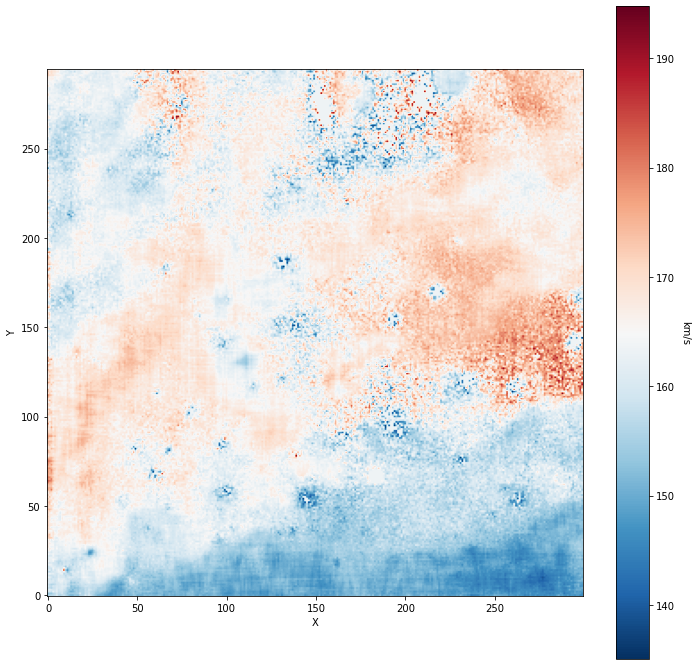

In [19]:
fig, ax = plt.subplots(figsize=(12, 12))


dataRV=vv[trim]

plt.figure(1)
plt.imshow(dataRV, cmap='RdBu_r')

cbar = plt.colorbar()
#plt.clim(225,350)
cbar.set_label('km/s', rotation=270, labelpad=15)  

ax.set_xlabel('X')
ax.set_ylabel('Y')


#ax.text(0.9, 0.1, '10 pc',
#        verticalalignment='bottom', horizontalalignment='right',
#        transform=ax.transAxes,
#        color='black', fontsize=20)
    
#plt.axhline(y=50, xmin=0.59, xmax=0.925, linewidth=2, color = 'k')


plt.gca().invert_yaxis()

In [20]:
RV=pd.DataFrame(vv[trim])

In [21]:
RV=RV.stack().reset_index().rename(columns={'level_0':'X', 'level_1':'Y', 0:'RV'})

Downsample v_map

In [22]:
mingoods= [2]

RVd=vv[trim]
m=pd.notna(RVd)

for mingood in zip(mingoods):
 [RVd], m= downsample([RVd], m, weights=None, mingood=mingood)

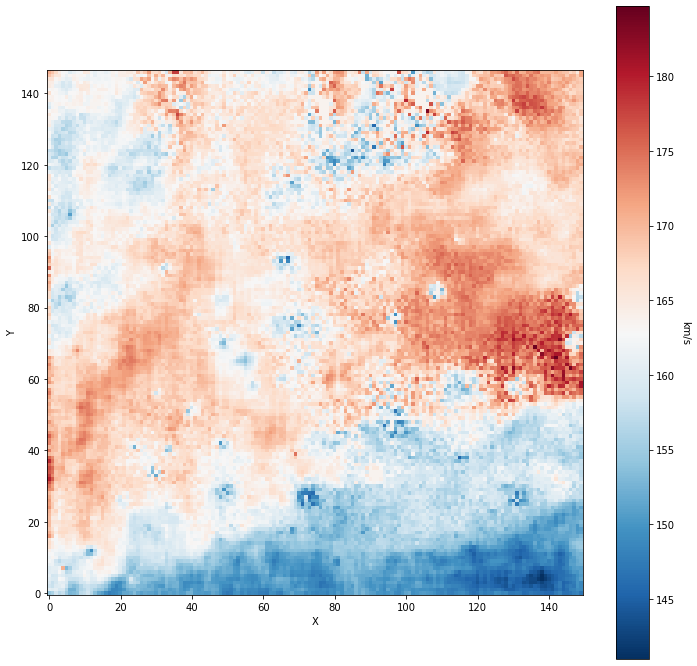

In [23]:
fig, ax = plt.subplots(figsize=(12, 12))


plt.figure(1)
plt.imshow(RVd, cmap='RdBu_r')

cbar = plt.colorbar()
#plt.clim(225,350)
cbar.set_label('km/s', rotation=270, labelpad=15)  

ax.set_xlabel('X')
ax.set_ylabel('Y')


#ax.text(0.9, 0.1, '10 pc',
#        verticalalignment='bottom', horizontalalignment='right',
#        transform=ax.transAxes,
#        color='black', fontsize=20)
    
#plt.axhline(y=50, xmin=0.59, xmax=0.925, linewidth=2, color = 'k')


plt.gca().invert_yaxis()

In [24]:
#RV=pd.DataFrame(RVd)
#RV=RV.stack().reset_index().rename(columns={'level_0':'X', 'level_1':'Y', 0:'RV'})

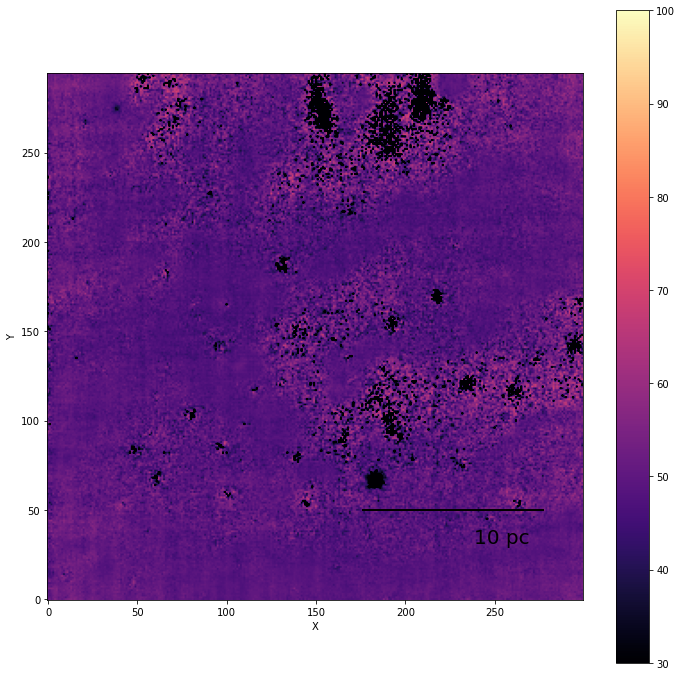

In [25]:
fig, ax = plt.subplots(figsize=(12, 12))


dataS=ss[trim]

plt.figure(1)
plt.imshow(dataS, cmap='magma')

cbar = plt.colorbar()
plt.clim(30,100)
cbar.set_label(' ', rotation=270, labelpad=15)  

ax.set_xlabel('X')
ax.set_ylabel('Y')


ax.text(0.9, 0.1, '10 pc',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=20)
    
plt.axhline(y=50, xmin=0.59, xmax=0.925, linewidth=2, color = 'k')


plt.gca().invert_yaxis()

In [26]:
dsig=pd.DataFrame(ss[trim])

In [27]:
dsig

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,49.742390,52.703098,49.462364,52.201206,56.063408,53.462860,50.996784,51.838421,49.596413,51.890919,...,53.432995,52.830997,54.367493,52.941776,55.127720,55.361576,52.988560,53.659424,54.789352,52.623978
1,48.576439,50.573280,49.596302,53.455936,52.854786,52.647987,49.532799,51.041862,51.834541,50.833065,...,51.668903,53.889946,52.616928,53.438580,52.833954,52.947353,52.691761,51.195187,51.955524,50.202854
2,49.322510,47.310158,49.859634,51.746864,54.070717,53.037170,52.538563,52.801384,50.801041,52.541039,...,50.586021,54.734844,55.660946,54.814762,53.271439,53.602543,50.465710,49.665752,48.303135,51.702789
3,50.162155,48.417152,50.263294,53.416935,54.063404,54.060955,51.625675,52.833031,51.347202,51.471436,...,53.494492,53.244385,55.345409,53.291859,53.479538,54.148384,51.700790,52.812469,52.086472,49.724804
4,48.132446,48.635193,51.517471,53.309933,54.462837,54.210270,51.396641,50.545147,51.468689,51.656235,...,54.360271,52.542000,52.871895,52.367435,52.375092,49.353458,51.696705,53.862217,53.528393,53.203045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,55.693657,50.877441,52.828152,51.405510,55.045502,52.252243,53.527397,53.049290,51.283657,52.927734,...,51.372368,59.779804,50.516739,58.765709,56.682178,55.831154,57.153702,52.233944,47.282608,58.143547
291,53.817364,51.015568,53.386501,49.581089,56.250114,52.617310,50.275009,53.638817,54.871902,54.661465,...,51.877190,56.573433,51.682842,60.792137,57.842682,57.431950,54.740852,52.738441,57.605286,51.995876
292,52.506512,50.218315,52.573082,51.417515,55.972771,54.004700,53.556244,52.336815,51.998920,50.735321,...,57.317020,57.547035,60.268723,56.580460,56.701374,59.187759,50.504681,50.254410,55.803043,55.986755
293,52.916740,50.155487,52.199116,51.082508,53.781170,51.568104,52.644001,52.344940,52.244118,50.993610,...,53.791691,55.654984,60.290386,56.020187,56.933037,58.407421,48.871609,53.937553,55.184868,51.254547


In [28]:
dsig=dsig.stack().reset_index().rename(columns={'level_0':'X', 'level_1':'Y', 0:'Sig'})

In [29]:
data=RV
data['I']=dffx.I
data['Sig']=dsig.Sig
data.describe()

,X,Y,RV,I,Sig
count,88500.000000,88500.000000,88500.000000,88500.000000,88500.000000
mean,147.000000,149.500000,163.737590,0.045044,48.233223
std,85.159157,86.602549,6.921827,0.038817,8.716486
min,0.000000,0.000000,135.074173,0.000000,0.000000
25%,73.000000,74.750000,159.875492,0.019273,46.788351
50%,147.000000,149.500000,164.591599,0.034099,48.954647
75%,221.000000,224.250000,168.249538,0.060108,51.386470
max,294.000000,299.000000,194.724380,1.000000,69.991142


In [30]:
mI=data.I>0

In [31]:
data[mI].describe()

,X,Y,RV,I,Sig
count,86470.000000,86470.000000,86470.000000,86470.000000,86470.000000
mean,145.592136,148.710501,163.742652,0.046101,49.365563
std,84.814334,87.119977,7.002526,0.038645,4.675636
min,0.000000,0.000000,135.074173,0.000673,30.006975
25%,72.000000,73.000000,159.709217,0.020209,46.978735
50%,146.000000,147.000000,164.773552,0.034887,49.047789
75%,218.000000,225.000000,168.337173,0.061004,51.461076
max,294.000000,299.000000,194.724380,1.000000,69.991142


Text(0.5, 6.79999999999999, 'Radial velocity [km/s]')

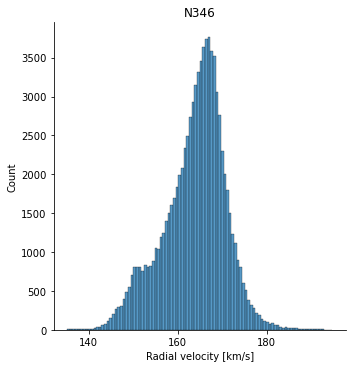

In [32]:
#sns.displot(RV[0]-RV[0].mean(),bins=100)
sns.displot(data[mI].RV,bins=100)

#plt.xlim(200,350)

#plt.text(0.75, 1.15,'n ='+str(RV[0].count()), ha='center', va='center', transform=ax.transAxes, color='k')
#plt.text(0.80, 0.82,'$μ$ ='+str(np.round(RV[0].mean(),2))+' km/s', ha='center', va='center', transform=ax.transAxes, color='k')
#plt.text(0.85, 1.25,'$σ^{2}$ ='+str(np.round(RV[0].var(),2))+' km$^{2}$/s$^{2}$', ha='center', va='center', transform=ax.transAxes, color='k')

plt.title('N346')

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"
plt.xlabel('Radial velocity [km/s]')

In [33]:
data_export_list = {
        'name': name_export, 
        'pc' : pc,
        's0' : s0,
        'pix' : pix,
         name_export : np.array(data[mI]),
      }
data_export_list

{'name': 'MUSE-N346-S',
 'pc': 0.3005844822879123,
 's0': 0.11487305055589005,
 'pix': 0.2,
 'MUSE-N346-S': array([[0.00000000e+00, 0.00000000e+00, 1.55018661e+02, 9.94646917e-02,
         4.97423897e+01],
        [0.00000000e+00, 1.00000000e+00, 1.56326416e+02, 1.03355802e-01,
         5.27030983e+01],
        [0.00000000e+00, 2.00000000e+00, 1.56619400e+02, 1.08980899e-01,
         4.94623642e+01],
        ...,
        [2.94000000e+02, 2.97000000e+02, 1.68959793e+02, 2.55846775e-02,
         5.55307541e+01],
        [2.94000000e+02, 2.98000000e+02, 1.66060623e+02, 2.67189698e-02,
         5.28997383e+01],
        [2.94000000e+02, 2.99000000e+02, 1.69797501e+02, 2.81039317e-02,
         5.34482994e+01]])}

In [34]:
data_export_matrix = {
       'name': name_export, 
       'pc' : pc,
       's0' : s0,
       'pix' : pix,
       'sb' : flux["DATA"].data.astype("float"),
       'vv' : rad_vel["DATA"].data.astype("float"),
       'ss' : sigma["DATA"].data.astype("float")

      }

data_export_matrix

{'name': 'MUSE-N346-S',
 'pc': 0.3005844822879123,
 's0': 0.11487305055589005,
 'pix': 0.2,
 'sb': array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 'vv': array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 'ss': array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]])}

In [35]:
class MyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(MyEncoder, self).default(obj)

In [36]:
jsonfilename =name_export +"-m.json"
with open(datapath_res/jsonfilename, "w") as f:
    json.dump(data_export_matrix, fp=f, indent=3, cls=MyEncoder)

In [37]:
jsonfilename =name_export +"-l.json"
with open(datapath_res/jsonfilename, "w") as f:
    json.dump(data_export_list, fp=f, indent=3, cls=MyEncoder)

In [38]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 8.218350410461426 seconds ---


In [39]:
!jupyter nbconvert --to script --no-prompt otv-MUSE-N346-S.ipynb

[NbConvertApp] Converting notebook otv-MUSE-N346-S.ipynb to script
[NbConvertApp] Writing 6067 bytes to otv-MUSE-N346-S.py
